In [2]:
import numpy as np
import pandas as pd
import sys
import scipy.io
import matplotlib.pyplot as plt
from tools import * 
from utils import *
import os
import pyaldata as pyd
import seaborn as sns


# Load dataset

In [3]:
dataset = 'M030_2024_04_11_17_00'
mouse_id = 'M030'


In [4]:
dir_to_key_points = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'+dataset+'_pose_estimation/'
df_pose = pd.read_csv(dir_to_key_points + dataset+'_3dpts_angles.csv')

In [5]:
df_pose.head()

,shoulder_center_x,shoulder_center_y,shoulder_center_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_paw_x,left_paw_y,left_paw_z,right_shoulder_x,...,right_wrist_error,right_wrist_score,right_wrist_ncams,fnum,left_elbow_angle,right_elbow_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,22.438472,-12.563070,176.304964,14.883734,-5.285433,179.918816,18.217056,7.949677,180.372575,25.339992,...,0,1,6,1,96.201514,108.735097,73.461557,81.224462,77.039638,72.748350
1,22.479162,-12.685833,176.334303,14.802492,-5.385494,179.553684,17.787448,8.148077,178.773330,25.262831,...,0,1,6,2,104.866535,105.945520,76.201710,79.234188,84.779265,71.784365
2,22.536699,-12.765489,176.307517,14.735870,-5.539276,179.360435,17.314465,8.373970,177.253949,25.125483,...,0,1,6,3,112.905718,107.682725,75.391632,73.785578,89.783858,68.311844
3,22.538444,-12.818086,176.323937,14.659918,-5.654130,179.304974,17.125875,8.541859,175.628185,24.847111,...,0,1,6,4,120.365535,110.698143,64.848497,68.633438,87.546723,67.603599
4,22.455877,-12.834291,176.383604,14.409061,-5.800087,179.208046,17.068394,8.547443,173.830726,24.744682,...,0,1,6,5,125.903631,114.823074,53.554825,65.615892,76.022920,69.012635


In [6]:
list_of_keypoints = ['shoulder_center', 'left_shoulder', 'right_shoulder', 'left_paw', 'right_paw', 'left_elbow', 'right_elbow', 'hip_center', 'left_knee', 'right_knee',
                     'left_ankle', 'right_ankle', 'tail_base', 'tail_middle', 'tail_tip', 'left_wrist', 'right_wrist']

In [7]:
for joint in list_of_keypoints:
    df_pose[joint+'_pos'] = df_pose.apply(lambda row: np.array([row[joint+'_x'], row[joint+'_y'], row[joint+'_z']]), axis=1)


In [73]:
df_pose.head()

,shoulder_center_x,shoulder_center_y,shoulder_center_z,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_paw_x,left_paw_y,left_paw_z,right_shoulder_x,...,hip_center_pos,left_knee_pos,right_knee_pos,left_ankle_pos,right_ankle_pos,tail_base_pos,tail_middle_pos,tail_tip_pos,left_wrist_pos,right_wrist_pos
0,23.522172,-11.073171,176.734921,23.905544,-2.122684,183.360456,20.219913,2.497059,184.892082,29.611330,...,"[4.72505339223529, 3.255043743208603, 163.5346...","[3.849069488105493, 1.0456538835337783, 175.99...","[17.810478745227226, 6.229213001798093, 156.96...","[-1.14639654339492, 9.5742933122138, 174.41633...","[11.61217606771344, 10.70804405691896, 164.858...","[2.371881478133181, 9.834912135525752, 162.474...","[-4.708653361786309, 18.223496601081845, 136.6...","[-16.31521745638187, 26.631384805794248, 109.0...","[23.54583734813956, 2.3208134581454947, 186.60...","[24.45877978081504, 7.722517164430324, 184.921..."
1,23.541971,-11.077324,176.771527,23.973561,-2.123446,183.373167,20.251643,2.484000,184.882316,29.619448,...,"[4.731707813992604, 3.25792757625782, 163.5808...","[3.844235334677707, 1.015224646509355, 176.049...","[17.797619849793847, 6.225773747648753, 156.96...","[-1.1535782095970473, 9.520936310228969, 174.4...","[11.54289469423494, 10.675599820171223, 164.83...","[2.36911159176398, 9.82868025258572, 162.47845...","[-4.731411169053486, 18.25315024224076, 136.64...","[-16.31363695965168, 26.629842780388348, 109.0...","[23.5677137185098, 2.4028930888914264, 186.618...","[24.472523793706696, 7.72174190335676, 184.893..."
2,23.556341,-11.090485,176.818384,24.030970,-2.127128,183.399270,20.288488,2.471571,184.867583,29.623415,...,"[4.738376543688225, 3.259601371901481, 163.625...","[3.831754083248792, 0.9862122395671826, 176.10...","[17.78339017334786, 6.221015119977477, 156.961...","[-1.1449905000611071, 9.488225578089418, 174.4...","[11.484297945900972, 10.639337091005816, 164.8...","[2.3665895942446293, 9.822139634080871, 162.48...","[-4.74486405026403, 18.26872991459704, 136.645...","[-16.311398971053755, 26.628254311853503, 109....","[23.58917066559837, 2.4865080474845787, 186.63...","[24.491464047158534, 7.721993753308682, 184.86..."
3,23.563028,-11.119400,176.876516,24.065400,-2.134234,183.423193,20.335252,2.461545,184.838728,29.604535,...,"[4.741245375112527, 3.2576577345966307, 163.66...","[3.799899456133478, 0.959063819475038, 176.140...","[17.763692990944936, 6.214031987162471, 156.95...","[-1.1397790482540755, 9.471586873736728, 174.3...","[11.438362772584336, 10.594203405299984, 164.8...","[2.364264586960835, 9.815433489703745, 162.499...","[-4.747822200345682, 18.267263906461604, 136.6...","[-16.308369143239506, 26.627289544483844, 109....","[23.61099108104804, 2.542019456980855, 186.650...","[24.521554668925496, 7.725490764157814, 184.82..."
4,23.564858,-11.159549,176.924512,24.074014,-2.146947,183.438606,20.392229,2.454174,184.789384,29.583986,...,"[4.728372017103938, 3.249298577812367, 163.691...","[3.741751150782453, 0.9312111714981092, 176.16...","[17.732625612995566, 6.20456762920824, 156.943...","[-1.1545431889001088, 9.460176141601746, 174.3...","[11.399981998380689, 10.53768312960376, 164.80...","[2.361543160181524, 9.809089671299208, 162.520...","[-4.744048901238961, 18.25165240782245, 136.70...","[-16.305565160664756, 26.628634021027164, 109....","[23.63067994053453, 2.5703126909388647, 186.66...","[24.563746323513044, 7.727905427891751, 184.76..."


In [74]:
list_of_angles = [col for col in df_pose.columns if 'angle' in col]


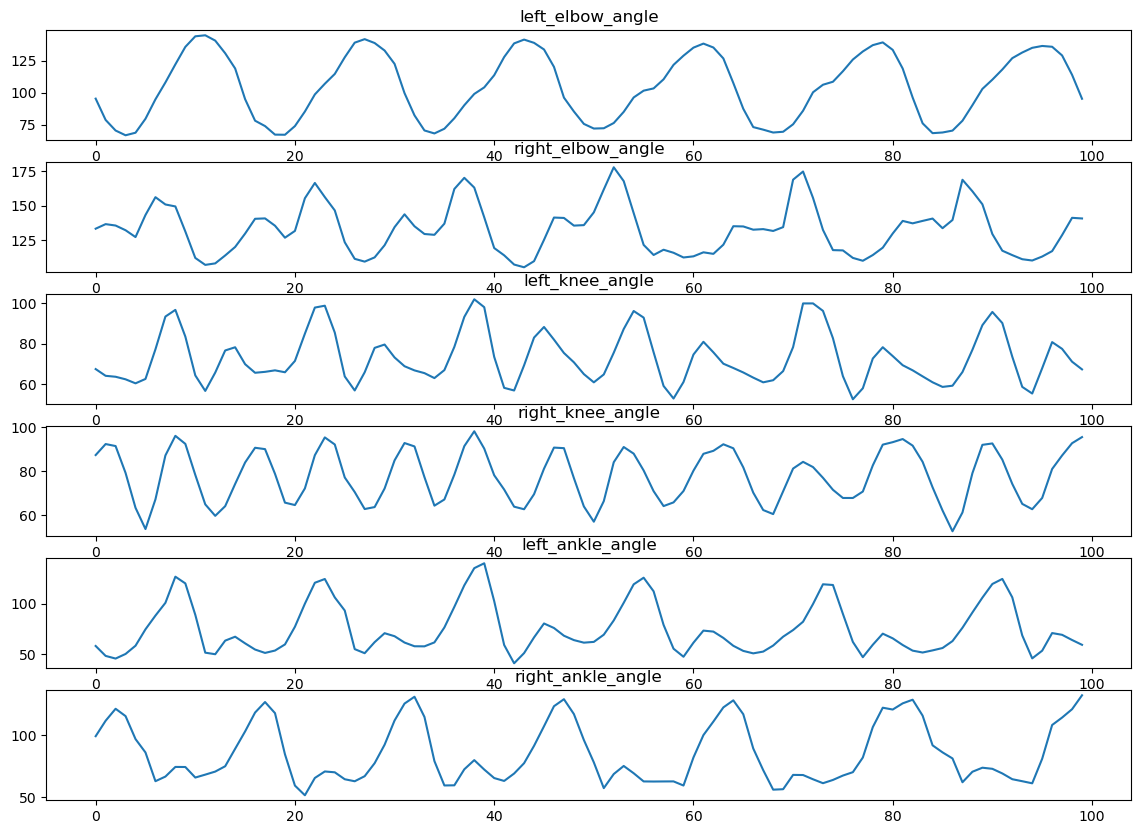

In [9]:
fig, axs = plt.subplots(6, 1, figsize=(14, 10))

axs = axs.flatten()

sec_start = 100
sec_end = 200

for i, joint in enumerate(list_of_angles):

    axs[i].set_title(joint)
    #axs[i].axis('off')
    axs[i].plot(df_pose[joint][sec_start:sec_end].values)


plt.savefig('./probe_analysis/pose_estimation/joint_angles_'+dataset+'.pdf')


# Look at perturbation trials 

In [8]:
data_dir = '/data/mouse_data/processed/'+mouse_id+'/'+dataset+'/'
fname = os.path.join(data_dir, dataset+'_pyaldata.mat')
df = pyd.mat2dataframe(fname, shift_idx_fields=False, td_name='df')


/home/cf620/miniconda3/envs/quake/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


field sol_nb could not be converted to int.


In [9]:
df.head()

,trial_id,event_time,sol_nb,sol_direction,perturbation_bin,trialType,m1_spikes,str_motor_spikes,s1_spikes,str_sensor_spikes,...,hip_center_pos,left_knee_pos,right_knee_pos,left_ankle_pos,right_ankle_pos,tail_base_pos,tail_middle_pos,tail_tip_pos,left_wrist_pos,right_wrist_pos
0,0,NaN,NaN,NaN,NaN,spontaneous,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[4.660734525812127, -5.514074384971747, 147.4...","[[-1.0773753861689568, 3.734055550338129, 156....","[[16.888541898297074, 0.2285686629167264, 151....","[[-5.159648557175953, 5.613558509088712, 147.1...","[[11.751064828136736, 8.028218556265886, 151.3...","[[3.0106492371667195, -0.6724851345112693, 142...","[[-8.96236834619256, -7.764141597814162, 127.4...","[[-8.374855700759003, -21.595157765011468, 94....","[[16.40575804751768, 6.370276362822087, 177.77...","[[24.38845974320632, 3.65970446694452, 173.683..."
1,1,610009.0,3,120.0,100.0,perturbation,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[10.860362548752482, -7.126023617487695, 144....","[[1.833855281415189, 0.6453905260981182, 151.4...","[[20.126061093363106, 0.1416679683430349, 153....","[[-4.677779529797385, 4.707715266302091, 145.2...","[[14.50896547645594, 7.359109960402509, 152.37...","[[9.554900070719505, -2.2347057696397785, 139....","[[3.6202509262732536, -11.246552749932404, 120...","[[23.490230403796023, -9.08937446577846, 90.68...","[[14.753407666994066, 6.215415110582876, 173.5...","[[23.82254036434528, 3.6285594381785606, 174.0..."
2,2,613653.0,0,300.0,100.0,perturbation,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,...",...,"[[7.282215540267813, -6.104586031151136, 146.2...","[[-0.0272356481821202, 2.118422440427938, 154....","[[19.22415489241209, 0.2369077342197741, 151.8...","[[-3.373331877805781, 4.788964561379891, 145.3...","[[13.365592656183958, 7.580655550931118, 149.9...","[[6.506575851454294, -1.2439351434860546, 140....","[[-6.168924664132599, -10.650101860098555, 126...","[[4.3649828644185735, -14.166055880548331, 91....","[[16.315871572266847, 6.42096608393281, 173.81...","[[25.87898976479377, 2.314228001818659, 174.89..."
3,3,618823.0,3,120.0,100.0,perturbation,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[-10.41575208420761, -2.626820129224868, 175....","[[-0.1244368510692499, -1.5452511210349047, 18...","[[-0.5719400059575184, 2.539960856203838, 166....","[[-3.5938231475802964, 7.38859873177318, 181.6...","[[-9.74095571357998, 3.96456469345509, 169.848...","[[-17.083290434148054, 0.1735946311804156, 175...","[[-32.67050061821064, -13.947432914151351, 166...","[[-12.826163473643213, 14.016798250157017, 179...","[[20.723560014242832, 7.3694829468908, 182.727...","[[26.349092201843067, 5.412917630674358, 176.9..."
4,4,629823.0,1,240.0,100.0,perturbation,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",...,"[[12.482789958367288, -5.4115312744605495, 144...","[[3.027586852952099, 3.026275646938072, 150.15...","[[22.51385770869597, -0.2931141220574629, 154....","[[2.879415546887271, 5.0131738218187465, 139.9...","[[19.9665119384864, 7.228002006385301, 150.071...","[[9.890823232752217, -0.1341545201519571, 140....","[[-7.328364654973469, 7.955134458664797, 128.5...","[[-37.16565429219374, 29.0

In [10]:
df_perturbed = df[df['trialType']=='perturbation']

## Look at the first perturbations

for i in

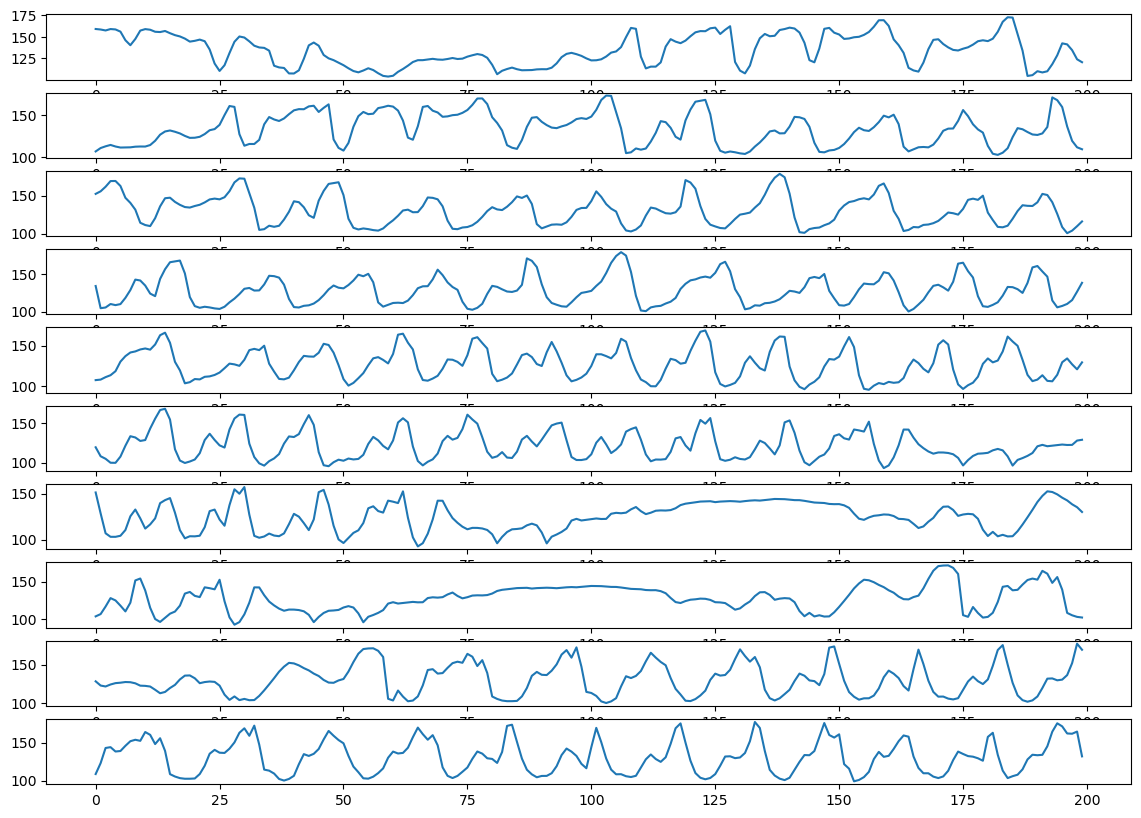

In [32]:

fig, axs = plt.subplots(10, 1, figsize=(14, 10))

axs = axs.flatten()


for i, trial in enumerate(df_perturbed.index[90:100]):

    axs[i].plot(df_perturbed.loc[trial,'right_elbow_angle'])

In [33]:
list_of_angles = [col for col in df_pose.columns if 'angle' in col]


# Example of perturbation where the animal keeps on running 

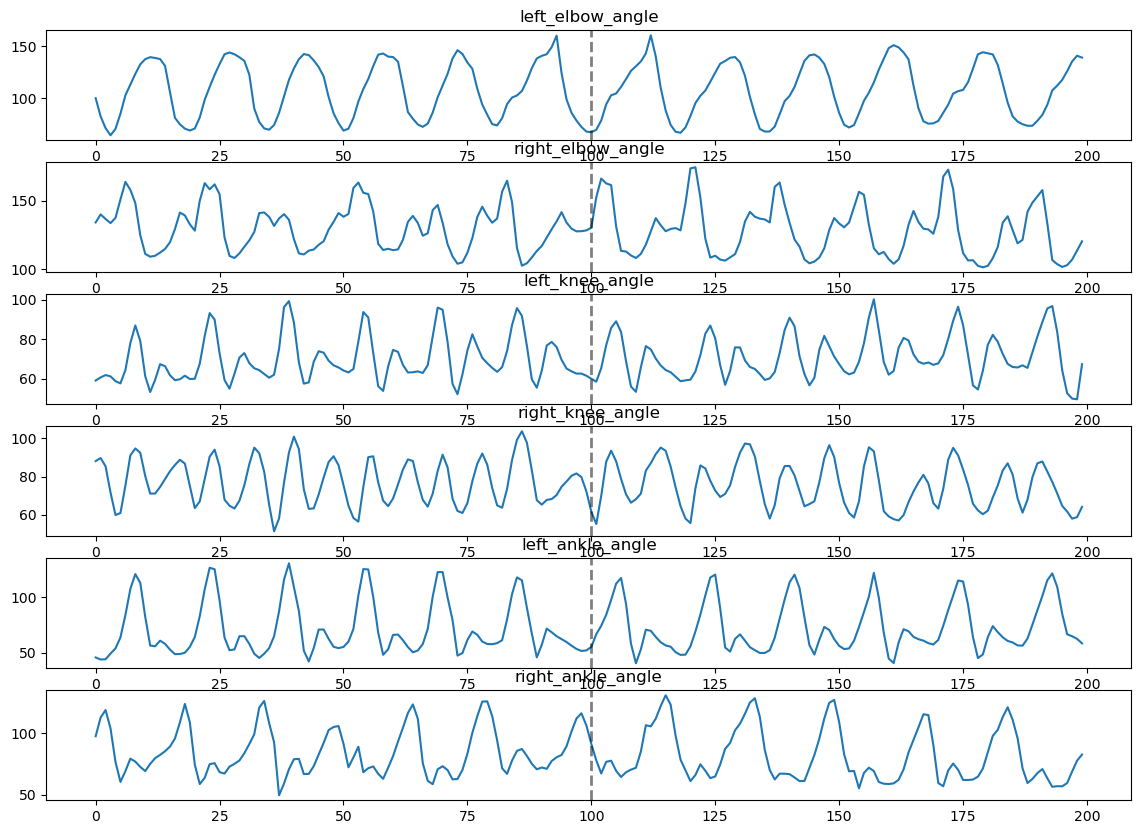

In [34]:
fig, axs = plt.subplots(6, 1, figsize=(14, 10))

axs = axs.flatten()


for i, joint in enumerate(list_of_angles):

    axs[i].set_title(joint)
    #axs[i].axis('off')
    axs[i].plot(df_perturbed.loc[5,joint])
    axs[i].axvline(x=100, color='black', linestyle='--', linewidth=2, alpha=0.5, label = 'Perturbation')


plt.savefig('./probe_analysis/pose_estimation/joint_angles_running_mouse_'+dataset+'.pdf')


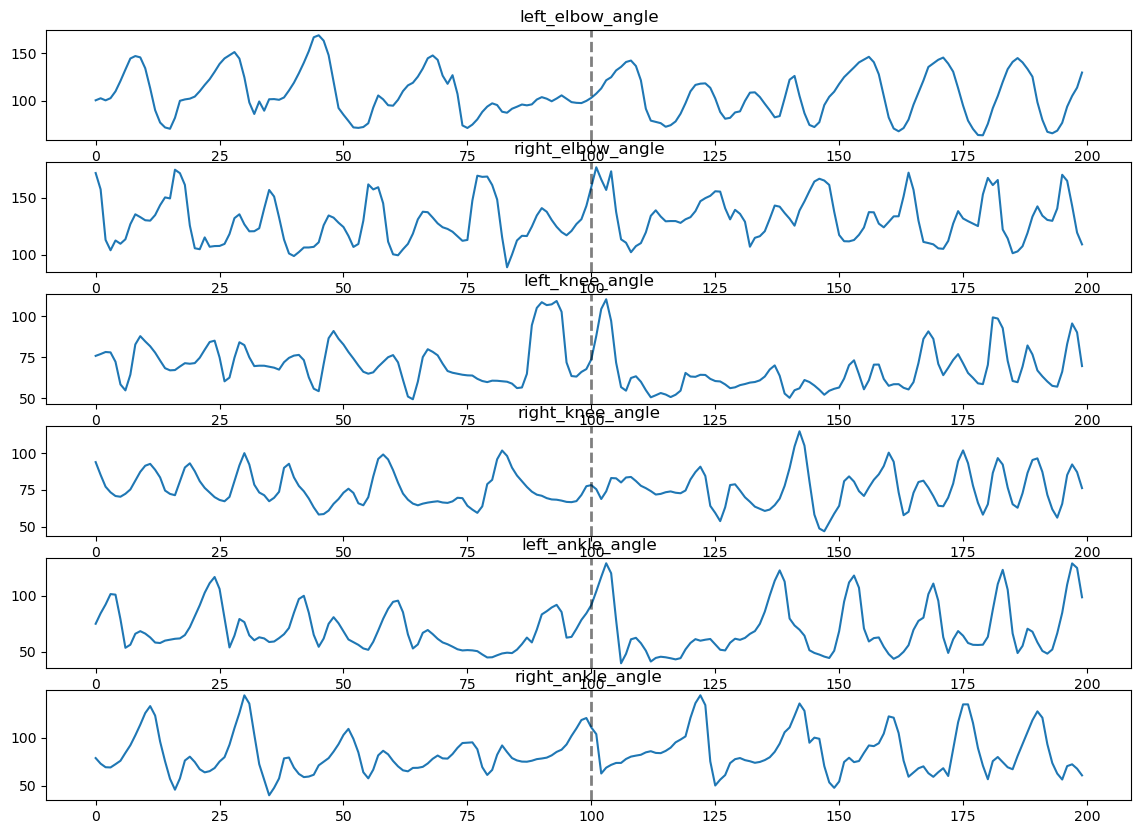

In [35]:
fig, axs = plt.subplots(6, 1, figsize=(14, 10))

axs = axs.flatten()


for i, joint in enumerate(list_of_angles):

    axs[i].set_title(joint)
    #axs[i].axis('off')
    # 21, 32
    axs[i].plot(df_perturbed.loc[20,joint])
    axs[i].axvline(x=100, color='black', linestyle='--', linewidth=2, alpha=0.5, label = 'Perturbation')


plt.savefig('./probe_analysis/pose_estimation/joint_angles_stopping_mouse_'+dataset+'.pdf')


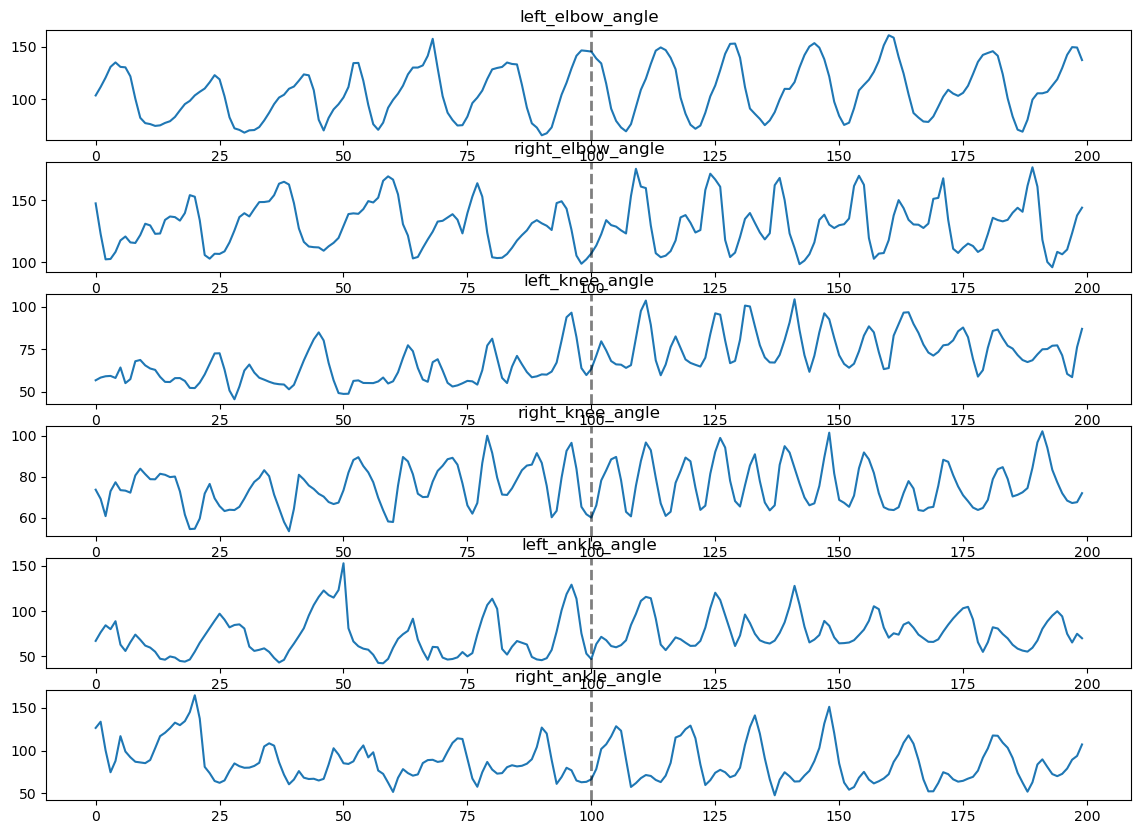

In [36]:
fig, axs = plt.subplots(6, 1, figsize=(14, 10))

axs = axs.flatten()


for i, joint in enumerate(list_of_angles):

    axs[i].set_title(joint)
    #axs[i].axis('off')
    # 21, 32
    axs[i].plot(df_perturbed.loc[18,joint])
    axs[i].axvline(x=100, color='black', linestyle='--', linewidth=2, alpha=0.5, label = 'Perturbation')


plt.savefig('./probe_analysis/pose_estimation/joint_angles_startrunning_mouse_'+dataset+'.pdf')


# Mean velocity analysis

In [11]:
# Function to compute velocity from position
def compute_velocity(positions, dt):
    # Calculate differences between consecutive positions
    velocity = np.diff(positions, axis=0) / dt
    # Append a zero velocity for the last position to keep the array shape consistent
    velocity = np.vstack([velocity, np.zeros((1, 3))])
    return velocity

In [12]:
list_of_keypoints = [col for col in df_pose.columns if '_pos' in col]

dt = 0.01 # 10ms bins

for keypoint in list_of_keypoints:

    string = keypoint
    keypoint = string.rsplit('_', 1)[0]

    df_perturbed[keypoint+'_vel'] = df[keypoint+'_pos'].apply(lambda pos: compute_velocity(pos, dt))


/tmp/ipykernel_1239641/550996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perturbed[keypoint+'_vel'] = df[keypoint+'_pos'].apply(lambda pos: compute_velocity(pos, dt))
/tmp/ipykernel_1239641/550996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perturbed[keypoint+'_vel'] = df[keypoint+'_pos'].apply(lambda pos: compute_velocity(pos, dt))
/tmp/ipykernel_1239641/550996.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

## Look at each keypoint individually 

In [13]:
# Function to calculate mean velocities for each period
def calculate_mean_velocities(velocities, before_time, during_time_end, after_time):
    # Mean velocities for each period
    mean_vel_before = np.mean(velocities[:before_time])
    mean_vel_during = np.mean(velocities[before_time:during_time_end])
    mean_vel_after = np.mean(velocities[after_time:])
    return mean_vel_before, mean_vel_during, mean_vel_after

def plot_confidence_interval(x, values):
    mean = np.mean(values)
    stdev = np.std(values)

    top = mean - stdev
    bottom = mean + stdev
    plt.plot([x, x], [top, bottom], linewidth=3)
    plt.scatter(x, mean, s=30)

    return mean

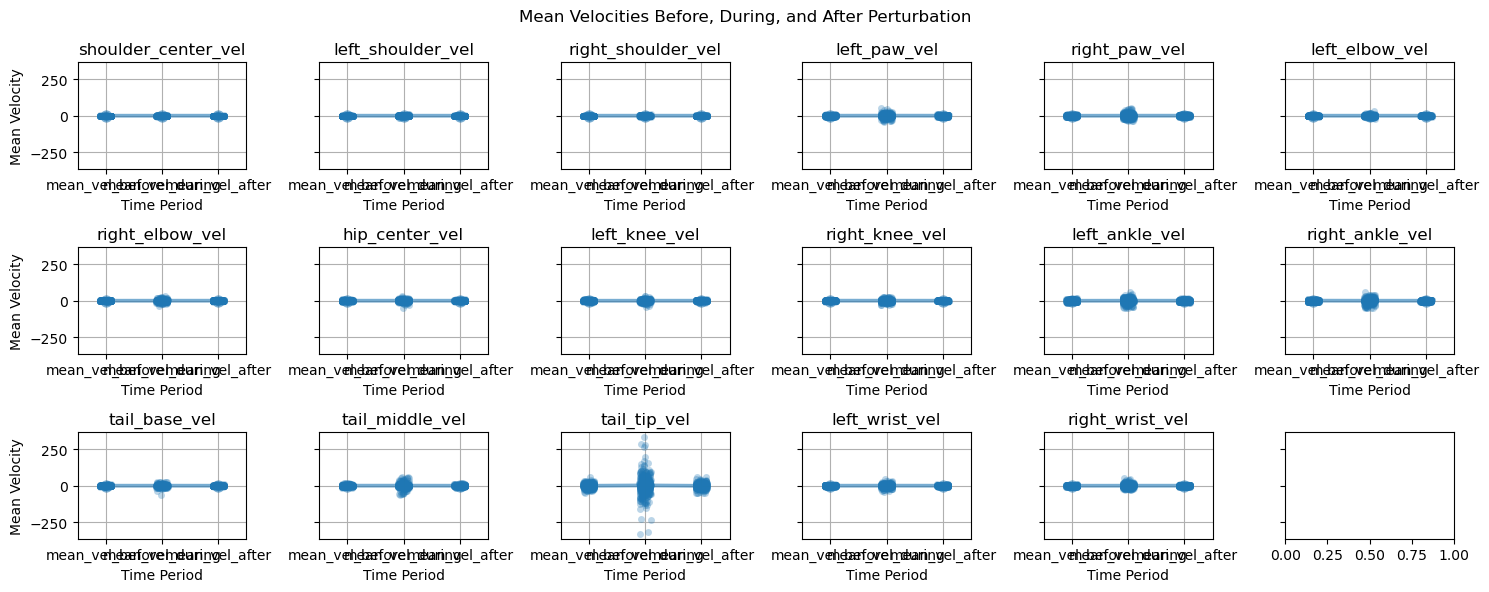

In [14]:


# Define time periods
before_time = 95
during_time_start = 95
during_time_end = 110
after_time = 110

# Calculate mean velocities and store in a new DataFrame
mean_velocities = {}

for col in df_perturbed.columns:
    if col.endswith('_vel'):
        mean_velocities[col] = {
            'mean_vel_before': [],
            'mean_vel_during': [],
            'mean_vel_after': []
        }
        
        for velocities in df_perturbed[col]:
            mean_before, mean_during, mean_after = calculate_mean_velocities(velocities,
                                                                              before_time,
                                                                              during_time_end,
                                                                              after_time)
            mean_velocities[col]['mean_vel_before'].append(mean_before)
            mean_velocities[col]['mean_vel_during'].append(mean_during)
            mean_velocities[col]['mean_vel_after'].append(mean_after)

# Create separate plots for each keypoint
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 6), sharey=True)
axes = axes.flatten()
fig.suptitle('Mean Velocities Before, During, and After Perturbation')

# Plotting using Seaborn for each keypoint
for i, (col, velocities) in enumerate(mean_velocities.items()):
    mean_vel_df = pd.DataFrame(velocities)
    mean_vel_df['row_id'] = mean_vel_df.index
    mean_vel_melted = mean_vel_df.melt(id_vars='row_id', value_vars=['mean_vel_before', 'mean_vel_during', 'mean_vel_after'],
                                       var_name='Time Period', value_name='Mean Velocity')
    
    # Point plot with standard deviation error bars
    sns.pointplot(data=mean_vel_melted, x='Time Period', y='Mean Velocity', errorbar='sd', alpha=0.6, ax=axes[i])

    # Strip plot for individual data points
    sns.stripplot(data=mean_vel_melted, x='Time Period', y='Mean Velocity', alpha=0.3, ax=axes[i])

    axes[i].set_title(col)
    axes[i].set_xlabel('Time Period')
    axes[i].set_ylabel('Mean Velocity')
    #axes[i].legend(title='Time Period', loc='upper left', labels=['Before', 'During', 'After'])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

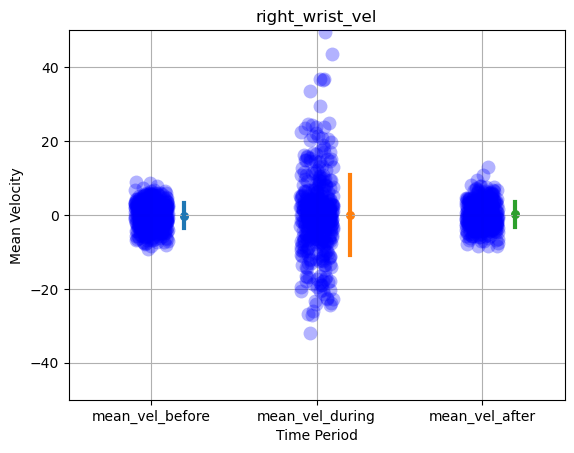

In [42]:
keypoint_choice = 'right_wrist_vel'

# Plotting using Seaborn for each keypoint
for i, (col, velocities) in enumerate(mean_velocities.items()):
    if col == keypoint_choice:
        mean_vel_df = pd.DataFrame(velocities)
        mean_vel_df['row_id'] = mean_vel_df.index
        mean_vel_melted = mean_vel_df.melt(id_vars='row_id', value_vars=['mean_vel_before', 'mean_vel_during', 'mean_vel_after'],
                                        var_name='Time Period', value_name='Mean Velocity')
        
        plot_confidence_interval(0.2, mean_vel_melted[mean_vel_melted['Time Period']=='mean_vel_before']['Mean Velocity'].values)
        plot_confidence_interval(1.2, mean_vel_melted[mean_vel_melted['Time Period']=='mean_vel_during']['Mean Velocity'].values)
        plot_confidence_interval(2.2, mean_vel_melted[mean_vel_melted['Time Period']=='mean_vel_after']['Mean Velocity'].values)
        # Strip plot for individual data points
        sns.stripplot(data=mean_vel_melted, x='Time Period', y='Mean Velocity', s = 10,alpha=0.3, color='blue')

        plt.title(col)
        plt.xlabel('Time Period')
        plt.ylabel('Mean Velocity')
        plt.ylim([-50,50])
        #axes[i].legend(title='Time Period', loc='upper left', labels=['Before', 'During', 'After'])
        plt.grid(True)

plt.savefig('./probe_analysis/pose_estimation/'+keypoint_choice+'_vel_'+dataset+'.pdf')
plt.show()